# Sleep classification using wrist-worn accelerometer 

## Data format 
input format: n x 3 x 900

sleep_label: n x 1 

With a sampling frequency of 30hz for tri-axis accelerometer 


## Learning objectives 
1. Sleep prediction using heuristic base method 
2. Sleep parameters derivation 
3. Sleep visualisation 


In terms of sleep data, we will be working with the [Newcastle dataset](https://zenodo.org/record/1160410#.ZAfRby-l1qs), which contains single night of polysomnography (PSG) data in 28 sleep clinic patients.

## 0. Data loading 
Dummy data creation

In [4]:
import numpy as np
import os

In [7]:
prac_root = '/Users/hangy/Dphil/code/RMLHDS/practicals/sleep_prac' 
y_path = os.path.join(prac_root, 'sample_y.npy')
y = np.load(y_path) # every 30-second of PSG was scored into one of the five sleep stages 

In [10]:
y

array([['W', '06-10-2013 23:42:27'],
       ['W', '06-10-2013 23:42:57'],
       ['W', '06-10-2013 23:43:27'],
       ...,
       ['W', '06-11-2013 08:23:27'],
       ['W', '06-11-2013 08:23:57'],
       ['W', '06-11-2013 08:24:27']], dtype='<U19')

## 1. Sleep prediction 
TODO: implement some simple sleep detection model 

Possible methods are described in [Towards Benchmarked Sleep Detection with Wrist-Worn Sensing Units](https://ieeexplore.ieee.org/document/7052479)


## 2. Sleep parameter estimation 

In [20]:
times = y[:, 1]
five_class_sleep_labels = y[:, 0]

In [21]:
np.unique(five_class_sleep_labels)

array(['N1', 'N2', 'N3', 'R', 'W'], dtype='<U19')

### 2.1 Label conversion 



In [35]:
# for simplicity, we will only deal with wake and sleep two classes 
WAKE_LABEL = 0
SLEEP_LABEL = 1
EPOCH_LENGTH = 30
label_dict = {'N1': SLEEP_LABEL,
              'N2': SLEEP_LABEL,
              'N3': SLEEP_LABEL,
              'R': SLEEP_LABEL,
              'W': WAKE_LABEL
            }
sleep_labels = [label_dict[my_class] for my_class in five_class_sleep_labels]
sleep_labels = np.array(sleep_labels)

In [32]:
np.unique(sleep_labels) # now our sleep labels only contain 0s and 1s 

array([0, 1])

### 2.2 Total sleep time estimate 
Getting total sleep time (tst) is easy because you will only need to count the number of sleep labels in the input array 

In [40]:
def get_tst(my_sleep_labels):
    # output in minutes 
    return np.sum(sleep_label==SLEEP_LABEL) * EPOCH_LENGTH / 60

In [41]:
get_tst(sleep_labels)

368.5

### 2.3 Sleep efficiency

Sleep efficiency (SE) = TST / Time in bed 

In [39]:
def get_se(my_sleep_labels):
    # assuming all the input labels are time in bed 
    timeinbed = len(my_sleep_labels) 
    return get_tst(my_sleep_labels) / timeinbed

In [42]:
get_se(sleep_labels)

0.3526315789473684

### Assignment: implement sleep onset latency (SOL) estimation 

Having seen how to compute total sleep time and sleep efficiency, could you implement the following two functons `get_sleep_onset` and `get_sleep_onset_latency`? 

Q: Do you know what is the SOL for this particular subject? 

### Assignment: Wake after sleep onset estimation 

Q: Do you know what is the WASO for this particular subject? 

## 3. Sleep visulisation 


In [68]:
import seaborn as sns 
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

sns.set_theme(style="darkgrid")


In [56]:
data2visu = {'times': times,
             'y': sleep_labels}

my_df = pd.DataFrame.from_dict(data2visu)
my_df['times'] = pd.to_datetime(my_df['times'])
my_df.head()

,times,y
0,2013-06-10 23:42:27,0
1,2013-06-10 23:42:57,0
2,2013-06-10 23:43:27,0
3,2013-06-10 23:43:57,0
4,2013-06-10 23:44:27,0


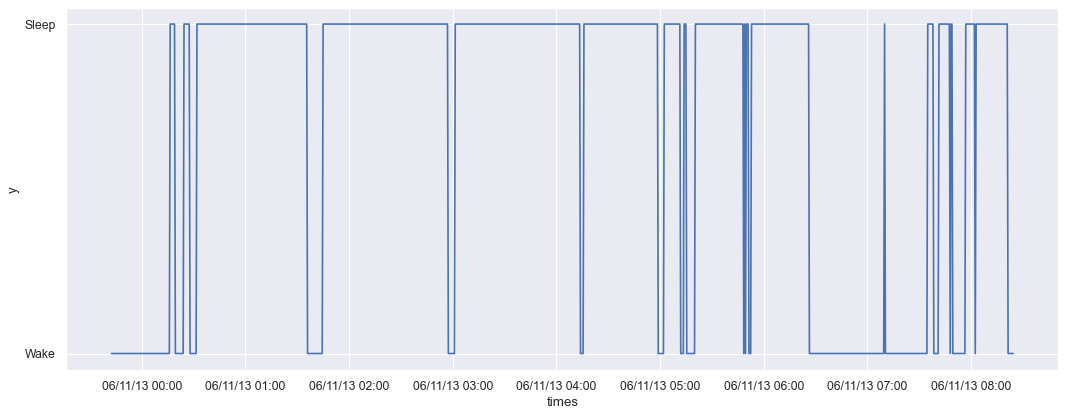

In [76]:
figure(figsize=(16, 6), dpi=80)

ax = sns.lineplot(x="times", y="y",
             data=my_df)
ax.set_yticks([0, 1])
ax.set_yticklabels(("Wake", "Sleep"))


myFmt = mdates.DateFormatter('%D %H:%M') # change timestamp format 
ax.xaxis.set_major_formatter(myFmt)

### Assignment: Better sleep visulisation 

High quality scientific figure is hard, can you try to improve the figure above and perhaps represent other sleep parameters such as SOL and WASO on the figure too enrich the data density? 